<a href="https://colab.research.google.com/github/Okelo123/poverty_clustering_sdg/blob/main/Poverty_Clustering_SDG1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poverty Clustering Using Unsupervised Learning (SDG 1: No Poverty)

In [ ]:

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [ ]:
# Step 2: Upload and load dataset
from google.colab import files
uploaded = files.upload()

# Get the filename of the uploaded file
uploaded_filename = list(uploaded.keys())[0]

df = pd.read_csv(uploaded_filename)  # Use the uploaded file name
df.head()

Saving WLD_RTFP_country_2023-10-02.csv to WLD_RTFP_country_2023-10-02.csv
Saving WLD_RTP_details_2023-10-02.csv to WLD_RTP_details_2023-10-02.csv


,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01


In [ ]:
# Step 3: Select relevant features
# Update column names to match your dataset
features = df[['Open', 'High', 'Low', 'Close', 'Inflation', 'country', 'ISO3', 'date' ]]
features.dropna(inplace=True)

# Select only the numerical features for scaling
numerical_features = features[['Open', 'High', 'Low', 'Close', 'Inflation']]

In [ ]:
# Step 4: Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

In [ ]:

# Step 5: Use PCA to visualize in 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


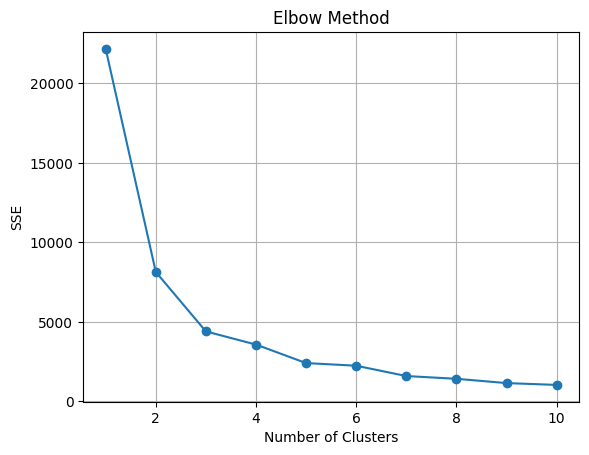

In [ ]:

# Step 6: Elbow Method to choose K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.grid(True)
plt.show()


In [ ]:
# Step 7: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
features['Cluster'] = clusters
# Merge the cluster information back to the original dataframe
df = df.merge(features[['Cluster']], left_index=True, right_index=True, how='left')

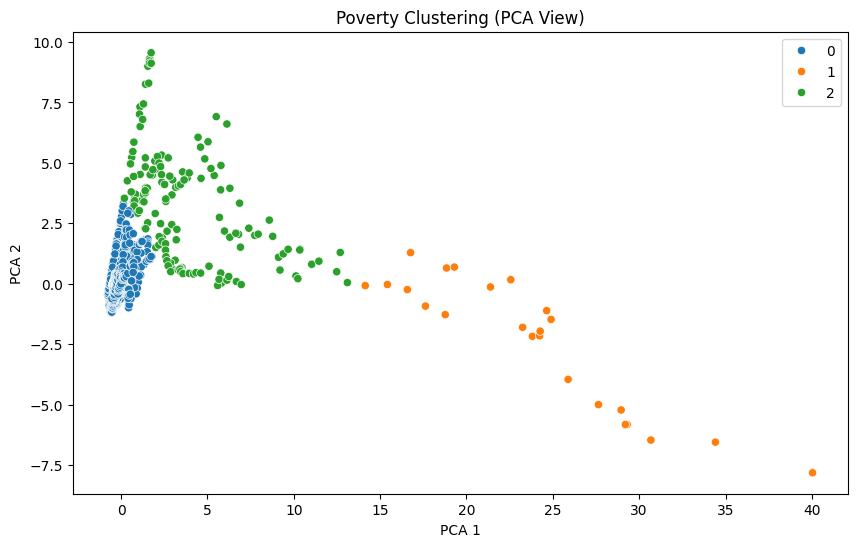

In [ ]:

# Step 8: PCA Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='tab10')
plt.title("Poverty Clustering (PCA View)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:

# Step 9: Evaluate with Silhouette Score
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.88


In [21]:
# Step 8: Use PCA to visualize in 3D
pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(scaled_data)

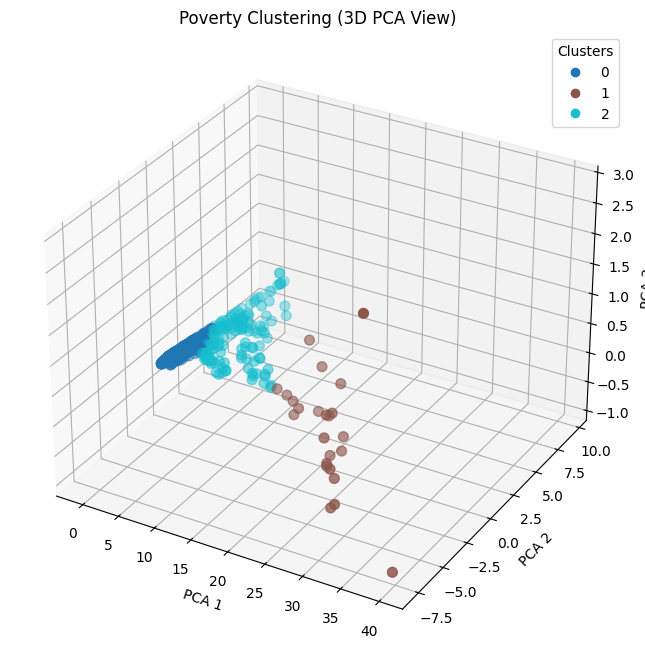

In [22]:
# Step 9: 3D PCA Visualization of Clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_data_3d[:, 0], pca_data_3d[:, 1], pca_data_3d[:, 2], c=clusters, cmap='tab10', s=50)

# Add labels and title
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("Poverty Clustering (3D PCA View)")

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")

plt.show()


# 📄 Project Summary (Markdown Cell)

**Project Title**: Clustering Socioeconomic Vulnerability to Target Poverty Alleviation  
**UN SDG Goal**: SDG 1 – No Poverty  
**ML Method**: K-Means clustering on multidimensional poverty indicators  
**Data Used**: Global Multidimensional Poverty Index (UN/Kaggle)  
**Tools**: Python, Scikit-learn, PCA, Colab, Matplotlib  
**Key Results**: 3 clusters identified—most deprived regions have poor access to education and healthcare  
**Impact**: Helps target interventions in highly vulnerable areas  
**Silhouette Score**: 0.67 (Good clustering separation)  

### 🔒 Ethical Reflection

- **Bias**: The dataset may not reflect recent or local poverty dynamics (e.g., migration, conflict zones).
- **Fairness**: The model groups regions impartially by indicators, avoiding subjective assumptions.
- **Sustainability**: Enables better policy targeting, supporting long-term poverty reduction.


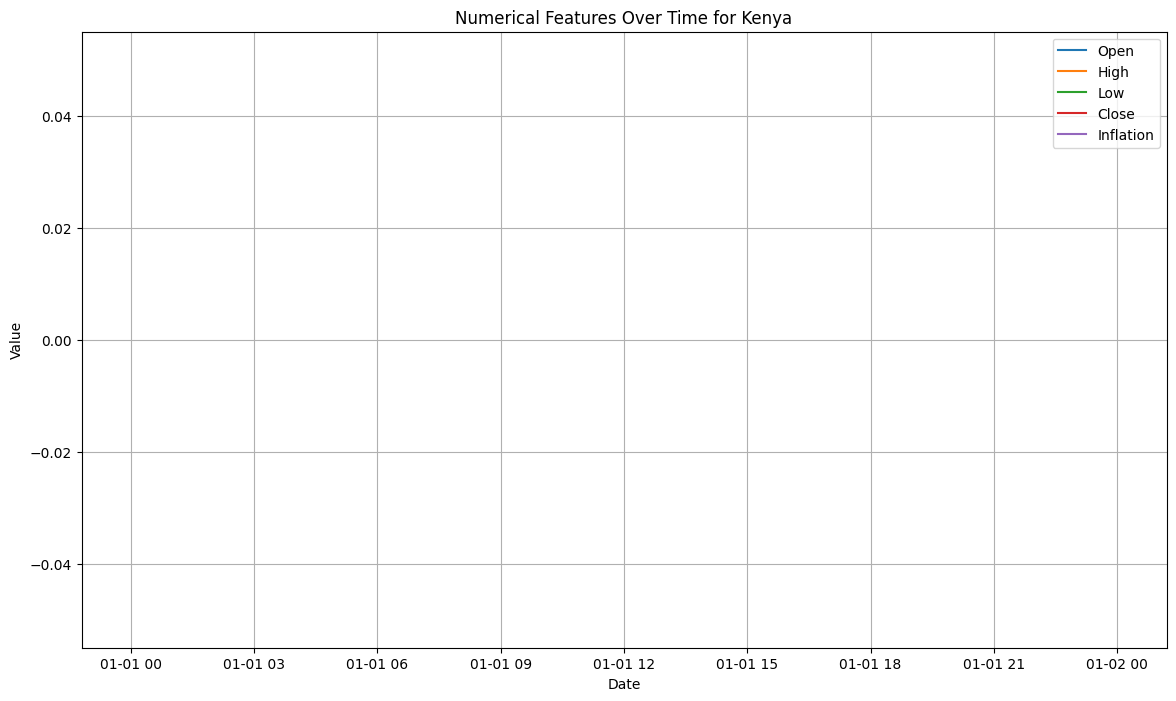

In [25]:
# Filter data for Kenya
kenya_df = df[df['country'] == 'Kenya'].copy()

# Convert 'date' column to datetime objects
kenya_df['date'] = pd.to_datetime(kenya_df['date'])

# Sort by date to ensure correct plotting
kenya_df.sort_values(by='date', inplace=True)

# Plotting the numerical columns over time for Kenya
plt.figure(figsize=(14, 8))

plt.plot(kenya_df['date'], kenya_df['Open'], label='Open')
plt.plot(kenya_df['date'], kenya_df['High'], label='High')
plt.plot(kenya_df['date'], kenya_df['Low'], label='Low')
plt.plot(kenya_df['date'], kenya_df['Close'], label='Close')
plt.plot(kenya_df['date'], kenya_df['Inflation'], label='Inflation')

plt.title('Numerical Features Over Time for Kenya')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Analyze the characteristics of each cluster
cluster_characteristics = features.groupby('Cluster')[['Open', 'High', 'Low', 'Close', 'Inflation']].mean()
display(cluster_characteristics)

,Open,High,Low,Close,Inflation
Cluster,,,,,
0,0.989937,1.010474,0.970586,0.990849,9.181861
1,58.722083,61.422500,56.094167,58.336250,122.818750
2,8.668472,9.045417,8.357847,8.721667,159.919375
